Birinchi o'rinda biz `kaggle` saytiga ulanib  kerakli kutubxonalarni yuklab  olishimiz kerak.
----------------------------

In [23]:
!pip install  kaggle

Biz endi `kaggle` saytiga kirib `api` ddegan bo'limiga kirib, yangi `api` token faylini yuklab google colab ishlayotgan joyimizga `kaggle.json` saylini olib kelishimiz kerak, shundagina biz kerakli narsalarni kompyuterimizga o'rnata olamiz va kaggle saytiga ulana olamiz

In [32]:
# Kaggle.json faylining yo'lini sozlash
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Endi `kaggle` saytidan ```CIFAR-10 - Object Recognition in Images``` datasetini yuklab olamiz.

Biz buni oddiy yuklab olsak ko'p vaqt talab etadi.

Shuning uchun biz `API` dan foydalanamiz.  (bu saytni o'zidan faylni yuklab olmasdan ishlatadi)

Faylni yuklab olish

In [33]:
# dataset api
!kaggle competitions download -c cifar-10

 99% 705M/715M [00:08<00:00, 197MB/s]
100% 715M/715M [00:08<00:00, 90.6MB/s]


qanday fayllar borligini tekshirish

In [34]:
!ls

cifar-10.zip  kaggle.json  sample_data


yuklab olgan zip faylimizni zipdan chiqarib olamiz

In [37]:
# siqilgan ma'lumotlar to'plamini chiqarish
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Ma\'lumotlar to\'plami chiqariladi')

Ma'lumotlar to'plami chiqariladi


qanday fayllar borligini tekshirish

In [38]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


`google colab` ishlayotgan joyimizga kerakli kurubxonalarni yuklab olamiz

In [39]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 49.7 MB/s eta 0:00:00


shu oldin zipdan chiqargan fayllarimizni endi `7z` fayli ko'rinishidan ozod etamiz

In [40]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

ochilganligini tekshirib ko'ramiz

In [41]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Bog'liqlarni import qilish

Kerakli kurubxonalarni yana yuklab olamiz

In [42]:
import os # fayl tizimlari bilan ishlash uchun ishlatiladi
import numpy as np # massivlar bilan ishlash
import pandas as pd # jadvallar bilan ishlash
from PIL import Image # rasmlarni chiqarish ishlatish
import matplotlib.pyplot as plt # Vizualzatsiya bilan ishlash
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split # malumotlarni train/test setlarga ajratish

/content/train papkasidagi fayllarning ro'yxatini olishni ifodalaydi.

In [43]:
filenames = os.listdir('/content/train')

In [44]:
type(filenames)

list

In [45]:
len(filenames)

50000

In [46]:
print(filenames[0:5])
print(filenames[-5:])

['15092.png', '21919.png', '45517.png', '44873.png', '5929.png']
['25651.png', '18286.png', '33323.png', '28165.png', '33887.png']


**Labels Processing**

`trainLabels.csv` faylini yuklab olamiz

In [47]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [48]:
labels_df.shape

(50000, 2)

In [49]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


shunchaki hohlagan indexda nima borligini ko'rish

In [50]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


jadval boshidan 10 ta qatorni ko'rish

In [51]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


jadval oxiridan 10 ta qatorni ko'rish

In [52]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


ustunlardagi qiymatlar soni

In [53]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

`label` ustunini `Series` ko'rinishida chiqarish

In [54]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

`labels_df` jadvalidagi `label` ustuni ko'rinishini sonlarga o'girib olamiz, bu ishimizni osonroq qilish uchun

In [55]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [56]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


rasmni chiqarib olish uchun `cv2` kutubxonasini chaqirib olib kerakli rasmni manzilini beramiz

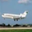

In [57]:
# namuna tasvirini ko'rsatish
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/7793.png')
cv2_imshow(img)

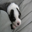

In [60]:
# namuna tasvirini ko'rsatish
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/45888.png')
cv2_imshow(img)

tepadagi `45888.png` faylini `labels_df` jadvalidagi ko'rinishi

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [61]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [62]:
id_list = list(labels_df['id'])

In [63]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [64]:
# rasmlarni numpy massivlarga aylantiring

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [65]:
type(data)

list

In [66]:
len(data)

50000

In [67]:
type(data[0])

numpy.ndarray

In [68]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
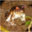

In [69]:
data[0]

In [70]:
# tasvirlar ro'yxati va yorliqlar ro'yxatini numpy massivlarga aylantiring

X = np.array(data)
Y = np.array(labels)

In [71]:
type(X)

numpy.ndarray

In [72]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

X va Y  larni train/test setlarga ajralish

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [79]:
# scaling the data - ma'lumotlarni masshtablash(ya'ni [0,1] oraliqqa joylash)

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [80]:
X_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)
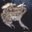

In [81]:
X_train[0]

**Building the Neural Network**  (Neyron tarmoqni qurish)

In [82]:
import tensorflow as tf
from tensorflow import keras

In [83]:
num_of_classes = 10

# setting up the layers of Neural Network - Neyron tarmoq qatlamlarini o'rnatish

model = keras.Sequential([
    # Bu qatlam 32x32 piksellik tasvirni tekislaydi va uning o'lchamini 1D massivga o'zgartiradi. Tasvir 3 tarkibiy rangli (RGB) bo'lgan tasvirni qabul qiladi.
    keras.layers.Flatten(input_shape=(32,32,3)),
    # Bu qatlam ma'lumotlarni to'plamdan chiqarib, yangi xususiyatlarni aniqlash uchun ishlatiladi.
    keras.layers.Dense(64, activation='relu'),
    # agar tasvirning nechta klassi bo'lsa, num_of_classes qiymati shu klasslar sonini ifodalaydi.
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [84]:
# compile the neural network - neyron tarmog'ini kompilyatsiya qilish
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [85]:
# training the neural network - neyron tarmog'ini o'rgatish
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 4ms/step - loss: 1.9681 - acc: 0.2896 - val_loss: 1.8526 - val_acc: 0.3405
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8154 - acc: 0.3506 - val_loss: 1.8904 - val_acc: 0.3160
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7696 - acc: 0.3680 - val_loss: 1.7890 - val_acc: 0.3605
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7465 - acc: 0.3766 - val_loss: 1.7414 - val_acc: 0.3853
Epoch 5/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7242 - acc: 0.3854 - val_loss: 1.7499 - val_acc: 0.3767
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7142 - acc: 0.3918 - val_loss: 1.7617 - val_acc: 0.3803
Epoch 7/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.7017 - acc: 0.3978 - val_loss: 1.7243 - val_acc: 0.3905
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

**ResNet50**

In [86]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [87]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [88]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [89]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [91]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=3)

Epoch 1/3
1125/1125 [==============================] - 451s 401ms/step - loss: 1.1479 - acc: 0.6062 - val_loss: 1.0755 - val_acc: 0.6398
Epoch 2/3
1125/1125 [==============================] - 445s 395ms/step - loss: 1.0222 - acc: 0.6549 - val_loss: 0.9624 - val_acc: 0.6710
Epoch 3/3
1125/1125 [==============================] - 445s 396ms/step - loss: 0.9271 - acc: 0.6889 - val_loss: 0.7964 - val_acc: 0.7335


In [92]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 39s 119ms/step - loss: 0.7950 - acc: 0.7203
Test Accuracy = 0.720300018787384


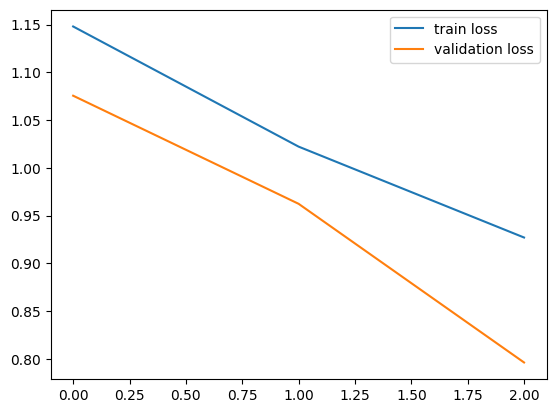

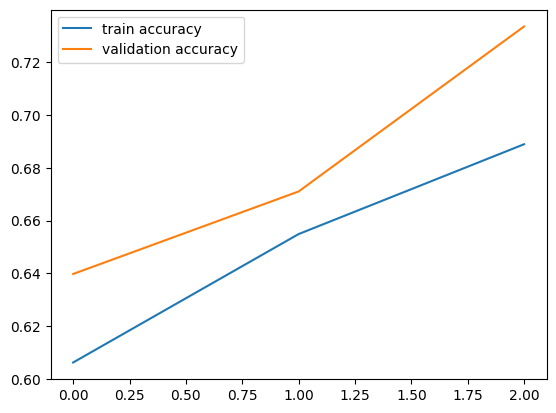

In [93]:
h = history

# plot the loss value - yo'qotish qiymatini belgilang
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value - aniqlik qiymatini chizing
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()